# SETUP


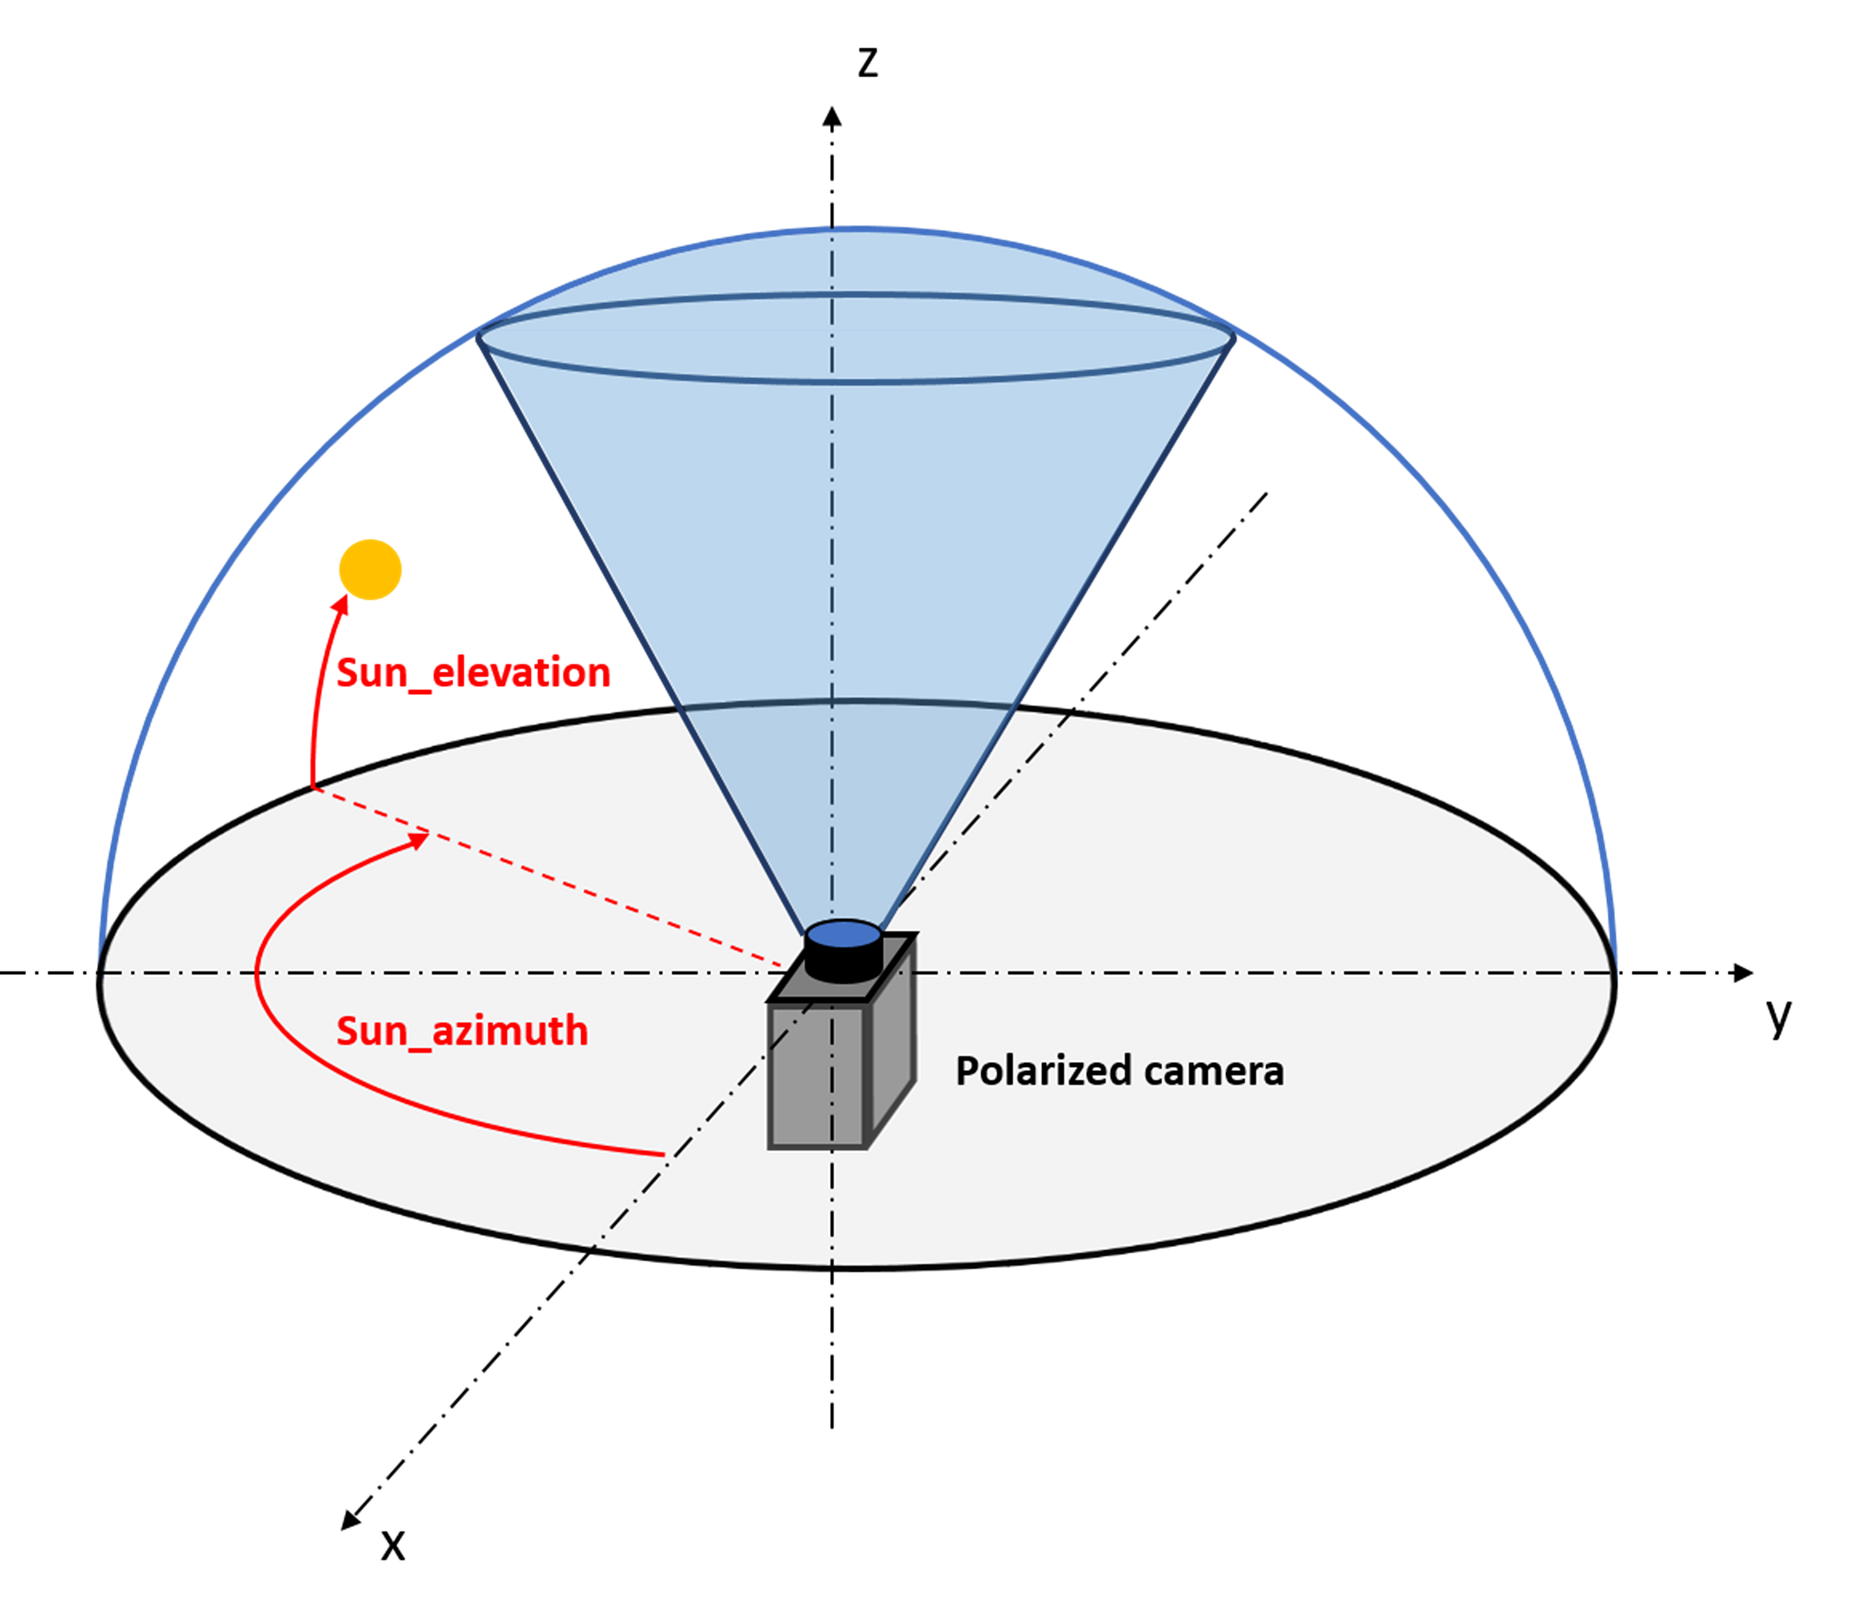

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# OPTICS SIMULATION INPUTS

here we compute the visual field of our sensor, for a camera pointing
toward true vertical axis (up, zenith axis)

 "particules_azimuth_matrix_deg" and "particules_elevation_matrix_deg" are
 the coordinate in degree, of the atmosphere particles conjugated with the
 sensor's pixels.
 azimuth is expressed in x,y camera image plane, seen from above.
 xyz is direct frame, z is up true vertical axis.
 seen from outputed camera image, y axis goes up on the image, x axis goes
 left on the image

In [2]:
from Simu_Optical_Conjugation import *
from Zenital_tilt import *
from Simu_Rayleigh import *
from Simu_Berry import *
from Simu_Sky_Intensity_CIE import *
from Simu_Micro_Polarizers import *
from Simu_Sensor import * #eq 27
from Simu_Data_Processing import *
import matplotlib.pyplot as plt

In [15]:
#open npy file
f = np.load('/Users/fauzikbr/Downloads/f.npy')
print(f)

519.8400142139211


In [16]:
#pixel size in micrometers
pixel_size = 3.45
#focal length in millimeters
f = 519.8400142139211
#sensor high in pixels
sensor_rows = 2048
#sensor length in pixels
sensor_cols = 2448
#conjugation type
r_conj = 'r2'

## OPTICS SIMULATION

In [17]:
particules_azimuth_matrix_rad,particules_elevation_matrix_rad,X_coordinate_pixels,Y_coordinate_pixels = Simu_Optical_Conjugation(pixel_size,sensor_cols,sensor_rows,f,r_conj,0,0)

## PARAMETERS FOR FUTURE RESULTS' PRINTS

In [18]:
x_pixel_mesh = (np.ones((Y_coordinate_pixels.size))[:,np.newaxis]) * X_coordinate_pixels[np.newaxis,:]
y_pixel_mesh = np.ones(X_coordinate_pixels.size)[np.newaxis,:]*((Y_coordinate_pixels))[:,np.newaxis]

## TILTED FIELD INPUTS


In [19]:
# here we compute
rotation_axis_azimuth_deg = 0
rotation_angle_deg = 0
rotation_axis_azimuth_rad = (np.pi / 180) * rotation_axis_azimuth_deg
rotation_angle_rad = (np.pi / 180) * rotation_angle_deg

## TILTED FIELD COMPUTATION

In [20]:
particules_azimuth_matrix_rad,particules_elevation_matrix_rad = Zenital_tilt(particules_azimuth_matrix_rad,particules_elevation_matrix_rad,rotation_axis_azimuth_rad,rotation_angle_rad)

## RAYLEIGHT'S MODEL INPUTS
sun azimuth is expressed in x,y camera image plane, seen from above.
xyz is direct frame, z is up true vertical axis.
seen from outputed camera image, y axis goes up on the image, x axis goes
left on the image

In [21]:

sun_azimuth_deg = 110.05
# sun elevation, in degree, from the ground (0) to the vertical z axis (or
# zenith (90)

sun_elevation_deg = 37.963512

# maximum DoLP observable in sky, 0.75 for usual clear sky
DoLP_Max = 0.75

## RAYLEIGHT'S MODEL SIMULATION

sun_elevation_rad = sun_elevation_deg * np.pi / 180
sun_azimuth_rad = sun_azimuth_deg * np.pi / 180
AoP_Matrix_Global_rad_Rayleigh,DoLP_Matrix_Rayleigh = Simu_Rayleigh(sun_elevation_rad,sun_azimuth_rad,particules_elevation_matrix_rad,particules_azimuth_matrix_rad,DoLP_Max)


(2048, 2448)


## PRINT RAYLEIGH'S MODEL SIMULATION RESULTS

Text(0.5, 1.0, 'DoLP with Rayleigh s model')

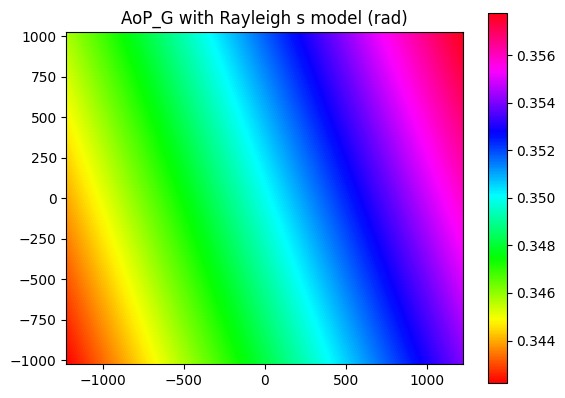

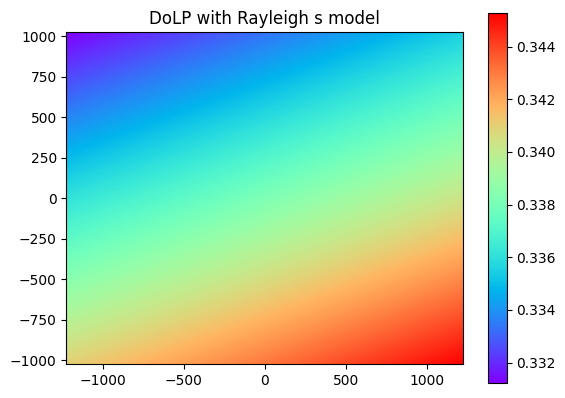

In [23]:
#Prepare colors for figures
#map = cmap('C1')
plt.figure()
h0 = plt.pcolormesh(x_pixel_mesh,y_pixel_mesh,AoP_Matrix_Global_rad_Rayleigh,cmap='hsv')
#h0 = plt.imshow(AoP_Matrix_Global_rad_Rayleigh,cmap='hsv')
#colormap(map)
#set(h,'EdgeColor','none')
#colorbar
plt.colorbar()
plt.axis('image')
plt.title('AoP_G with Rayleigh s model (rad)')

plt.figure()
h00 = plt.pcolormesh(x_pixel_mesh,y_pixel_mesh,DoLP_Matrix_Rayleigh,cmap='rainbow')
#set(h,'EdgeColor','none')
#colorbar
plt.colorbar()
plt.axis('image')
plt.title('DoLP with Rayleigh s model')


## BERRY'S MODEL INPUTS

 sun azimuth is expressed in x,y camera image plane, seen from above.
 xyz is direct frame, z is up true vertical axis.
 seen from outputed camera image, y axis goes up on the image, x axis goes
 left on the image

In [11]:
sun_azimuth_deg

# sun elevation, in degree, from the ground (0) to the vertical z axis (or
# zenith (90)

sun_elevation_deg

# maximum DoP observable in sky, 0.75 for usual clear sky
DoLP_Max

# angle between Babinet and Brewster points in degrees:
delta_deg = 140

## BERRY'S MODEL SIMULATION

In [12]:
sun_elevation_rad = sun_elevation_deg * np.pi / 180
sun_azimuth_rad = sun_azimuth_deg * np.pi / 180
delta_rad = delta_deg * np.pi / 180
AoP_Matrix_Global_rad_Berry,DoLP_Matrix_Berry = Simu_Berry(sun_elevation_rad,sun_azimuth_rad,particules_elevation_matrix_rad,particules_azimuth_matrix_rad,delta_rad,DoLP_Max)

## PRINT BERRY'S MODEL SIMULATION RESULTS


Text(0.5, 1.0, 'DoLP with Berry s model')

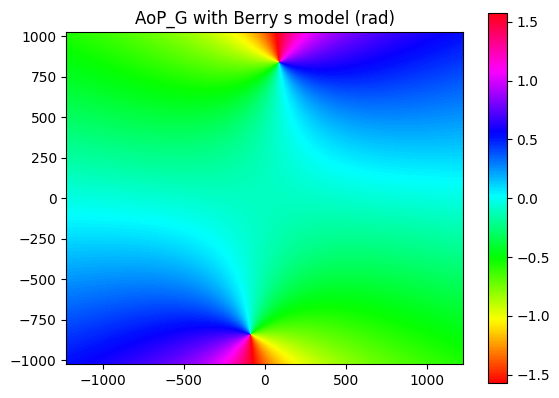

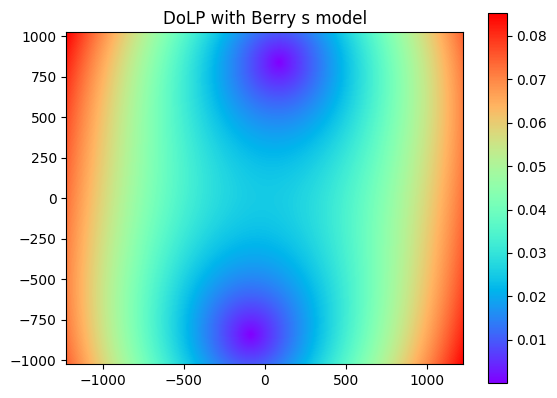

In [13]:
#print on pixel map
#x_pixel_mesh = np.transpose(np.ones((Y_coordinate_pixels.shape,Y_coordinate_pixels.shape))) * X_coordinate_pixels
#y_pixel_mesh = (np.transpose(Y_coordinate_pixels)) * np.ones((X_coordinate_pixels.shape,X_coordinate_pixels.shape))
#Prepare color for figures
plt.figure()
h1 = plt.pcolormesh(x_pixel_mesh,y_pixel_mesh,AoP_Matrix_Global_rad_Berry,cmap='hsv')
#colormap(map)
#set(h,'EdgeColor','none')
plt.colorbar()
plt.axis('image')
plt.title('AoP_G with Berry s model (rad)')
plt.figure()
h2 = plt.pcolormesh(x_pixel_mesh,y_pixel_mesh,DoLP_Matrix_Berry,cmap='rainbow')
#set(h,'EdgeColor','none')
plt.colorbar()
plt.axis('image')
plt.title('DoLP with Berry s model')


## SKY RADIANCE SIMULATION INPUTS



In [14]:
# sun azimuth is expressed in x,y camera image plane, seen from above.
# xyz is direct frame, z is up true vertical axis.
# seen from outputed camera image, y axis goes up on the image, x axis goes
# left on the image
sun_azimuth_deg

# sun elevation, in degree, from the ground (0) to the vertical z axis (or
# zenith (90)

sun_elevation_deg

# CIE table sky model number, refere to the Article
#"Analysis of vertical sky components under various CIE standard
# general skies" from D.H.W. Li, C. Li, S.W. Lou, E.K.W. Tsang and J.C. Lam
# wrote in 2015
CIE_Sky_number = 9

## SKY RADIANCE SIMULATION

In [15]:
Skylight_Relative_Intensity = Simu_Sky_Intensity_CIE(sun_azimuth_rad,sun_elevation_rad,particules_azimuth_matrix_rad,particules_elevation_matrix_rad,CIE_Sky_number)

## PRINT SKY RADIANCE SIMULATION RESULTS

Text(0.5, 1.0, 'Skylight Relative Intensity')

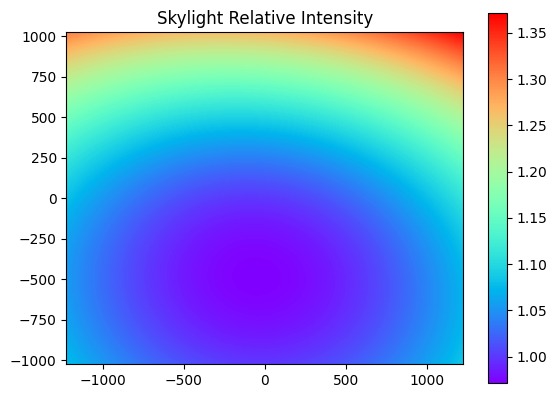

In [16]:
plt.figure()
h3 = plt.pcolormesh(x_pixel_mesh,y_pixel_mesh,Skylight_Relative_Intensity,cmap='rainbow')
#set(h,'EdgeColor','none')
plt.colorbar()
plt.axis('image')
plt.title('Skylight Relative Intensity')

## MICRO POLARIZER SIMULATION INPUTS

In [17]:
# The sensor called in this simulation  is based on sony IMX250MZR sensor
# used in FLIR BFS-U3-51S5P-C camera.
# It is a sensor with a micro-polarizer array, each block of 2 by 2 pixels
# possess 4 type of linear micro-polarizer oriented at 0,45,90 and 135
# degrees.

# Here we compute micro-polarizer array effects

# we already set size in OPITCS SIMULATION INPUTS :
sensor_rows
sensor_cols
# each polarizer is not realy at its supposed orientation, here we put the
# mechanical tolerance in polarizer orientation in degrees
tolerance_deg = 1
# If T1 is the intensity transmitance for an incident ray totaly linearly
# polarized along transmission axis and T2 is the intensity transmittance
# for an incident ray totally linearly polarized at 90 degrees from
# transmission axis, then the extinction rassio is (T1-T2)/(T1+T2).
# Because we work with relative intensity their is no need to take into
# account absorbance, so we suppose null absorbance, which means T1+T2=1.

extinction_ratio = 0.99
## MICRO POLARIZER SIMULATION

tolerance_rad = tolerance_deg * np.pi / 180
# We chose to use results from Berry's model for this example:
Intensity_on_pixels = Simu_Micro_Polarizers(Skylight_Relative_Intensity,AoP_Matrix_Global_rad_Berry,DoLP_Matrix_Berry,tolerance_rad,extinction_ratio)


## PRINT MICRO POLARIZER SIMULATION RESULTS

Text(0.5, 1.0, 'Ligth relative intensity after micro-polarizers')

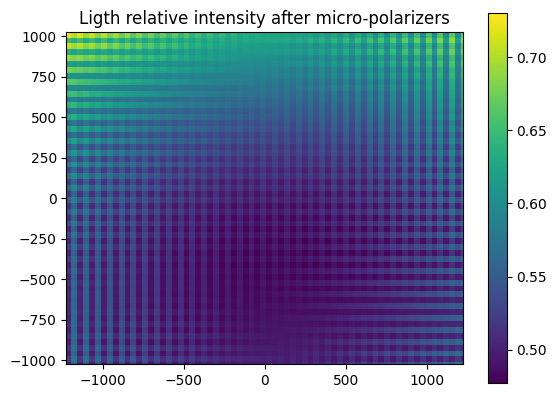

In [18]:
#here the figure is set as returned image
plt.figure()
h4 = plt.pcolormesh(- x_pixel_mesh,y_pixel_mesh,Intensity_on_pixels)
#set(h,'EdgeColor','none')
plt.colorbar()
plt.axis('image')
plt.title('Ligth relative intensity after micro-polarizers')

## SENSOR'S SIMULATION INPUTS

In [19]:
# This part deals with pixels simulation

# Here we enter the saturation ratio
# It is the ratio between the sensor irradiance saturation value and the
# maximum relative irradiance comming on sensor's pixels.
pixel_saturation = 1.6

# Here we enter the number of output bits for grayscale
number_of_bits = 12
# Here we enter the per pixel gaussian noise Signal to Noise Ratio
SNR = 50

## SENSOR'S SIMULATION

In [20]:
Bits_Matrix = Simu_Sensor(Intensity_on_pixels,pixel_saturation,number_of_bits,SNR)

## PRINT SENSOR SIMULATION RESULTS

Text(0.5, 1.0, 'Bits Matrix returned to camera user - grayscale')

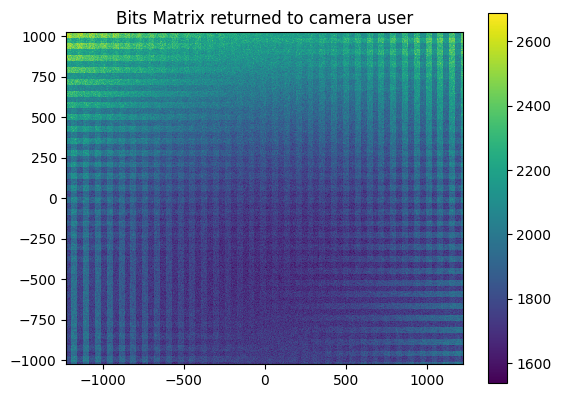

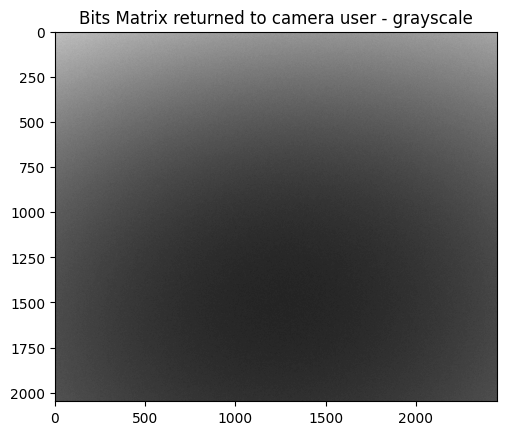

In [21]:
#here the figure is set as returned image
plt.figure()
h5 = plt.pcolormesh(- x_pixel_mesh,y_pixel_mesh,Bits_Matrix)
#set(h,'EdgeColor','none')
plt.colorbar()
plt.axis('image')
plt.title('Bits Matrix returned to camera user')
#transform grayscale image in 8 bits grayscale image
Bits_Matrix_8B = ((np.floor(255 * (1 / (2 ** number_of_bits - 1)) * (Bits_Matrix).astype('double'))).astype('uint8'))
#here the figure is set as returned image
plt.figure()
plt.imshow(Bits_Matrix_8B,cmap='gray')
plt.title('Bits Matrix returned to camera user - grayscale')


## DATA PROCESSING

Text(0.5, 1.0, 'Calculated DoLP')

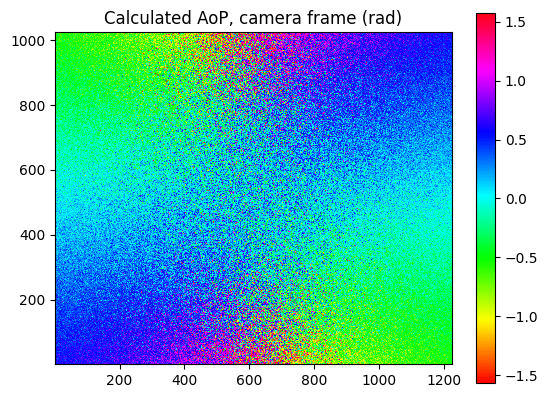

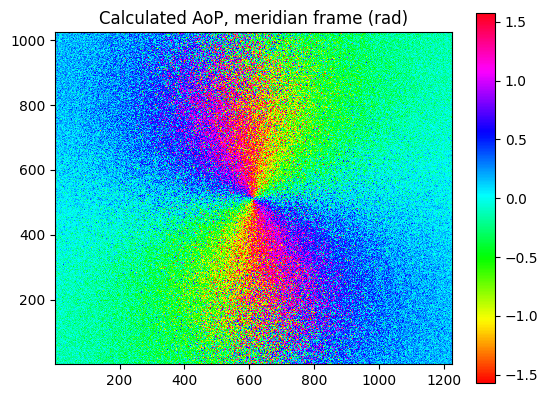

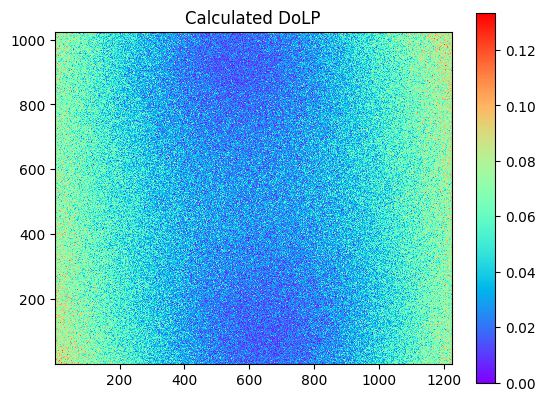

In [22]:
# This part is not a real part of the simulator.
# It is just about to deal with camera output and compute polarization
# measurment, just like we would do with a real camera.

AoP_data_processing_imframe,AoP_data_processing_meridianframe,DoLP_data_processing = Simu_Data_Processing(Bits_Matrix)
rows_print,cols_print = DoLP_data_processing.shape
X_mesh_print = np.ones((rows_print,1)) * (np.arange(1,cols_print+1,1))
Y_mesh_print = ((np.arange(rows_print,1+- 1,- 1)))[:,np.newaxis] * np.ones((1,cols_print))
#map = cmap('C1')
#map=plt.colormap('hsv')
plt.figure()
h6 = plt.pcolormesh(X_mesh_print,Y_mesh_print,AoP_data_processing_imframe,cmap='hsv')
#colormap(map)
#set(h,'EdgeColor','none')
plt.colorbar()
plt.axis('image')
plt.title('Calculated AoP, camera frame (rad)')
plt.figure()
h7 = plt.pcolormesh(X_mesh_print,Y_mesh_print,AoP_data_processing_meridianframe,cmap='hsv')
#colormap(map)
#set(h,'EdgeColor','none')
plt.colorbar()
plt.axis('image')
plt.title('Calculated AoP, meridian frame (rad)')
plt.figure()
h8 = plt.pcolormesh(X_mesh_print,Y_mesh_print,DoLP_data_processing,cmap='rainbow')
#set(h,'EdgeColor','none')
plt.colorbar()
plt.axis('image')
plt.title('Calculated DoLP')


## COMPARISON WITH OUTDOOR REAL CAMERA CAPTURE

outside capture results


Text(0.5, 1.0, 'Outdoor capture DoLP, meridian frame (rad)')

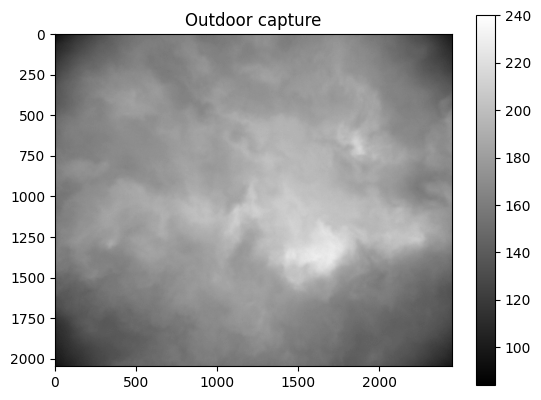

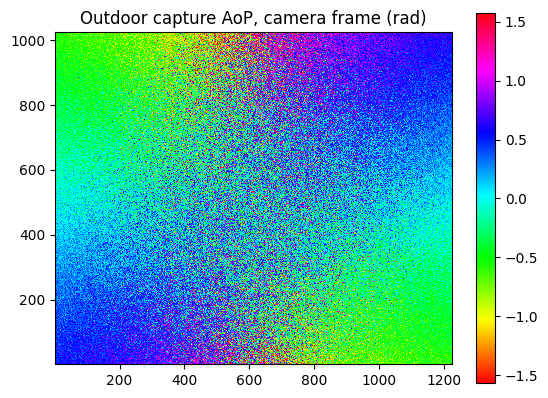

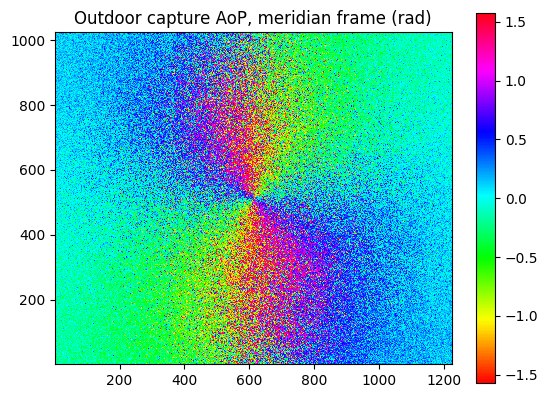

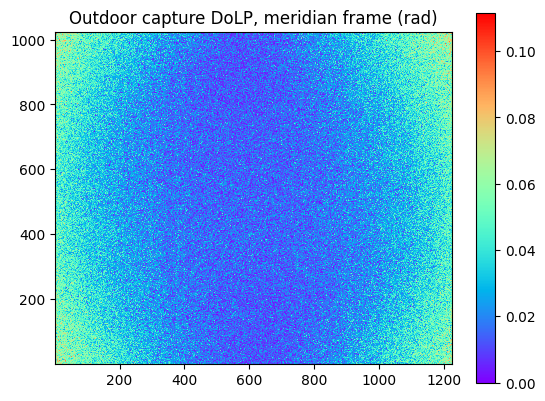

In [23]:
#This part is not a real part of the simulator.
#Here we compare our simulation with real outdoor capture
#To do so we use the same data treatment for outdoor output camera data
#than for simulated output camera data

Camera_capture = plt.imread('TEST_overcast_sky.tiff')
Camera_capture_8B = (np.uint8(np.floor((255 / (- 1 + 2 ** 16)) * Camera_capture)))
plt.figure()
plt.imshow(Camera_capture_8B,cmap='gray')
plt.colorbar()
plt.title('Outdoor capture')
MaxCapture = np.amax(np.amax(Camera_capture))
print("outside capture results")
Camera_capture_double = (Camera_capture).astype('double')
AoP_expe_imframe,AoP_expe_meridianframe,DoLP_expe = Simu_Data_Processing(Camera_capture_double)
rows_print_cam,cols_print_cam = DoLP_expe.shape
X_mesh_print_cam = np.ones((rows_print_cam,1)) * (np.arange(1,cols_print_cam+1,1))[np.newaxis,:]
Y_mesh_print_cam = ((np.arange(rows_print_cam,1+- 1,- 1)))[:,np.newaxis] * np.ones((1,cols_print_cam))
#map = cmap('C1')
plt.figure()
h9 = plt.pcolormesh(X_mesh_print_cam,Y_mesh_print_cam,AoP_expe_imframe,cmap='hsv')
#colormap(map)
#set(h,'EdgeColor','none')
plt.colorbar()
plt.axis('image')
plt.title('Outdoor capture AoP, camera frame (rad)')
plt.figure()
h10 = plt.pcolormesh(X_mesh_print_cam,Y_mesh_print_cam,AoP_expe_meridianframe,cmap='hsv')
#colormap(map)
#set(h,'EdgeColor','none')
plt.colorbar()
plt.axis('image')
plt.title('Outdoor capture AoP, meridian frame (rad)')
plt.figure()
h11 = plt.pcolormesh(X_mesh_print_cam,Y_mesh_print_cam,DoLP_expe,cmap='rainbow')
#set(h,'EdgeColor','none')
plt.colorbar()
plt.axis('image')
plt.title('Outdoor capture DoLP, meridian frame (rad)')